In [1]:
#라이브러리 호출
import numpy as np

#배열 생성
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

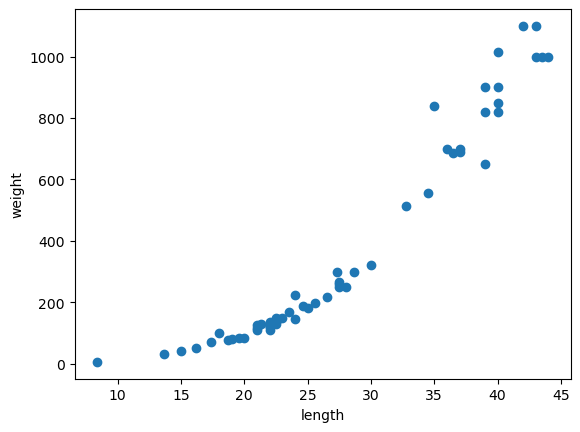

In [2]:
#시각화 : 산점도
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [3]:
#트레이닝/테스트 셋 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(f"train_input:\n{train_input.ndim}")
print(f"train_input:\n{train_input.shape}")
print(f"train_input:\n{train_input[:5]}")
print(f"train_input:\n{test_input.ndim}")
print(f"test_input:\n{test_input.shape}")
print(f"test_input:\n{test_input[:5]}")
print("\n1차원 배열인 것을 2차원배열로 전환해야함")

train_input:
1
train_input:
(42,)
train_input:
[19.6 22.  18.7 17.4 36. ]
train_input:
1
test_input:
(14,)
test_input:
[ 8.4 18.  27.5 21.3 22.5]

1차원 배열인 것을 2차원배열로 전환해야함


In [4]:
train_input = train_input.reshape(-1,1) #-1을 지정하면 나머지 원소개수로 모두채우라는 의미임
test_input = test_input.reshape(-1,1)

print(f"train_input:\n{train_input.ndim}")
print(f"train_input:\n{train_input.shape}")
print(f"train_input:\n{train_input[:5]}")
print(f"train_input:\n{test_input.ndim}")
print(f"test_input:\n{test_input.shape}")
print(f"test_input:\n{test_input[:5]}")

train_input:
2
train_input:
(42, 1)
train_input:
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]
train_input:
2
test_input:
(14, 1)
test_input:
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]]


In [5]:
#모델 생성 및 훈련 : 결정계수(R^2)
from sklearn.neighbors import KNeighborsRegressor
#모델생성
knr = KNeighborsRegressor()
#모델훈련
knr.fit(train_input,train_target)
#점수 확인
print(f"점수\t:\n{knr.score(test_input,test_target)}")

점수	:
0.992809406101064


In [6]:
from sklearn.metrics import mean_absolute_error

#테스트세트 예측
test_predict = knr.predict(test_input)
print(test_predict)

#결정계수 오차 확인
mae = mean_absolute_error(test_target, test_predict) #실제값과 예측값으로 오차확인
print(f"오차\t:\t{round(mae,2)}") #약 19g 정도의 오차가 발생함

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
오차	:	19.16


과대적합/과소적합<br>
*보통 훈련 세트의 점수가 조금더 높게나오는데, 그 이유는 훈련세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나옴<br>
(1)과대적합 : 훈련 점수는 좋으나 테스트 점수가 굉장히 낮을경우<br>
(2)과소적합 : 테스트 점수가 훈련 점수보다 다소 높거나 두점수가 모두 낮을 경우. 이는 훈련/테스트 데이터 양이 매우 적기때문임

In [7]:
print(f"트레이닝 점수\t:\t{knr.score(train_input,train_target)}")
print(f"테스트 점수\t:\t{knr.score(test_input,test_target)}")
print("테스트 점수가 높은것으로 과소적합으로 보임")

트레이닝 점수	:	0.9698823289099254
테스트 점수	:	0.992809406101064
테스트 점수가 높은것으로 과소적합으로 보임


In [8]:
#이웃의 개수를 3으로 설정
knr.n_neighbors = 3 #지정을 안하면 기본값 5

#모델 재훈련
knr.fit(train_input,train_target)

#점수 확인
print(f"트레이닝 점수\t:\t{knr.score(train_input,train_target)}")
print(f"테스트 점수\t:\t{knr.score(test_input,test_target)}")

트레이닝 점수	:	0.9804899950518966
테스트 점수	:	0.9746459963987609


K-최근접이웃의 한계

In [9]:
#라이브러리 호출
import numpy as np

#배열 생성
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [10]:
from sklearn.model_selection import train_test_split

#훈련/테스트 세트 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)

print(f"변경전 train input :\n{train_input[:5]}")
print(f"변경전 test input :\n{test_input[:5]}")
#사이킷런에 돌리기위해 2차원배열로 구분
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(f"변경후 train input :\n{train_input[:5]}")
print(f"변경후 test input :\n{test_input[:5]}")

변경전 train input :
[19.6 22.  18.7 17.4 36. ]
변경전 test input :
[ 8.4 18.  27.5 21.3 22.5]
변경후 train input :
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]
변경후 test input :
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]]


In [11]:
from sklearn.neighbors import KNeighborsRegressor

#k-최근접 이웃 회귀 모델 생성. 이웃은 기본값 5 에서 3으로 수정
knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input,train_target)

#예측 진행(길이 50cm농어)
nong_fish = np.array([[50]])
print(knr.predict(nong_fish))

[1033.33333333]


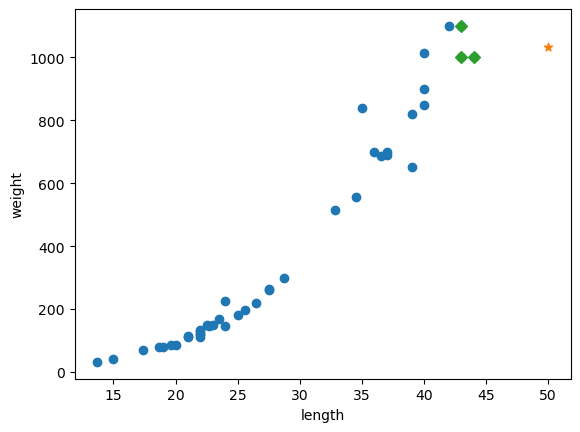

In [12]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors(nong_fish)

#산점도 그리기
plt.scatter(train_input, train_target) #훈련세트
plt.scatter(50,1033, marker="*") #신규농어 50cm로 예측했을때 1033g으로 나왔기때문에
plt.scatter(train_input[indexes], train_target[indexes], marker="D") #이웃샘플 표시

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [13]:
print(f"신규농어의 이웃 평균 무게 : {np.mean(train_target[indexes])}")

신규농어의 이웃 평균 무게 : 1033.3333333333333


In [14]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #객체생성
lr.fit(train_input, train_target) #훈련학습

lr_nong = lr.predict([[50]]) #예측 : 길이 50인 농어
print(lr_nong)

[1241.83860323]


In [15]:
print(f"기울기(회계계수 또는 가중치) :\t{lr.coef_}")
print(f"절편 :\t{lr.intercept_}")

기울기(회계계수 또는 가중치) :	[39.01714496]
절편 :	-709.0186449535477


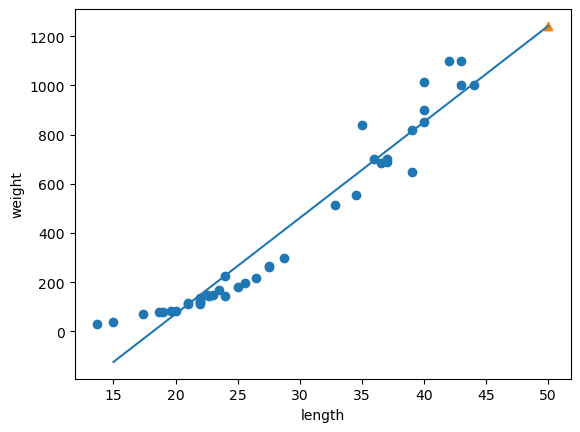

In [16]:
#농어 길이 15~50까지 직선으로 그리기.
plt.scatter(train_input,train_target)

#15~50까지 1차 방정식 그래프 그리기 : 기울기 & 절편
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) #테스트 세트

0.939846333997604
0.8247503123313558


1차 직선을 적용해보니 위와 같이 20이하의 데이터가 들어오면 - 값을 예측하게됨. 이는 무게가 -인데 옳지않음. 따라서 1차 직선이 아닌 2차 다항식을 적용하는 것곽 같은 회귀차수를 높인는 절차필요함

In [18]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [19]:
#객체생성
lr = LinearRegression()

#학습
lr.fit(train_poly, train_target)

#예측
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [20]:
print(f"기울기(회귀계수 또는 가중치) :\t{lr.coef_}")
print(f"절편 :\t{lr.intercept_}")

기울기(회귀계수 또는 가중치) :	[  1.01433211 -21.55792498]
절편 :	116.05021078278259


무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05<br>
와 같이 그래프 학습

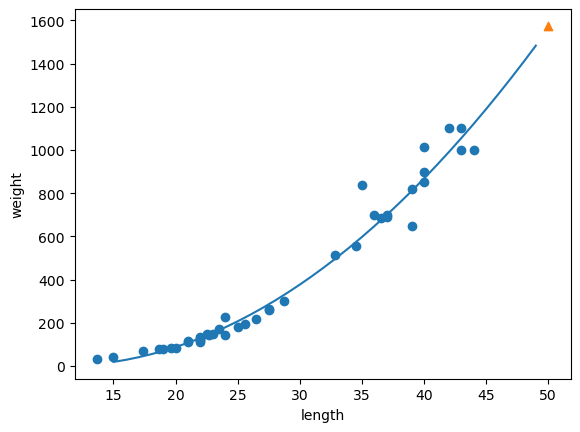

In [21]:
point = np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point, 1.01*point**2 - 21.6*point+116.05)

plt.scatter(50,1574,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [22]:
print(f"결정계수 :{lr.score(train_poly, train_target)}")
print(f"결정계수 :{lr.score(test_poly, test_target)}")
#테스트 스코어가 약간 높은것으로 보아 과소적합이 보임

결정계수 :0.9706807451768623
결정계수 :0.9775935108325121
